# Project Phase One - Used Car Prices in United States

### Phase 1 report checklist
Here's a checklist of items that you _absolutely_ should include:

1. [x] a background report on the team's members, their self-identified skills, and individual contributions
- [x] a discussion of what you would like to your analysis to do, who/what it will support
- [x] an exhibition of analyses from dataset(s) explored, including visual analyses, captions, and useful descripitions
- [x] a discussion of who might be interested in your analysis
- [x] a discussion of how your analysis might fit into an application or investigation
- [x] a discussion of how your analysis is limited and could be improved
- [x] a selection of data for continued analysis, including justification
- [ ] a discussion of how your analysis might be completed and disseminated, i.e., who's the target audience?

Additionally, by the end of the term your final report should inlcude items like
1. [ ] a README.md that describes what is present in the project analysis and how it may be repeated
- [ ] code that documents your analysis&mdash;your instructor should be able to re-run the analysis!
- [ ] tables, figures, and discussion supporting the analysis' interpretation

_Note_: These are not exhaustive lists of topics or tasks worth covering in your project. In general, if there's something interesting about your project, whether relating to the source data's construction, existence, or novelty of the tergeted tools and applications, or _anything else_, then be sure to document it!

- [x] standardize the scale of the variables for the box plots.
- [X] make the bar plots prettier
- [x] choose a dataset from available ones.
- [x] examine the remaining dataset
- [x] add lists from other notes
- [x] correlation matrix
- [x] look for and clean up outliers
- [x] missing/null values.
- [ ] LATER: turn off sampling and re-run
- [ ] LATER: show density of locations on a map of car listing locations, correlation to price or featuers.

## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)
    
I am a MS CS student at Drexel. I expect to complete my degree in June 2023 at the end of the next quarter.
I have been a software developer for a long time, and have significant experience with Python.
I have some hands on experience with machine learning, and have taken machine learning, deep learning, artificial intellience, computer vision and DSCI 501 courses at Drexel.

I do not have as much background with exploratory data analysis.

A number of the prior projects that I have worked on have been focused on classification, for example of images or sentiment analysis of textual data.

Since much of my experience with handling data sets for machine learning problems has been through graduate CS courses, I have implemented them typically without a dependency on anything but NumPy and matplotlib for visualizing results, which means I actually have limited experience with existing common tools like scikit-learn. 

I am competent at using LaTex, but not an advanced user.

I do have experience with numpy and some with pandas.  I have some experience with matplotlib for visualizing aspects of data.

The areas and skills I would like to grow through this project are:

1. More hands-on experience with scikit-learn and Pandas libraries.
2. More practice with visualization tools, such as matplotlib and Seaborn.
3. More practical experience with investigating a dataset, i.e. what data cleaning is needed.
4. Experience with a practical machine learning regression problem.
5. Feature selection techniques to make machine learning problems more effective.


## Topic 

I would like to better understand some of the things that influence the price of used vehicles.
During COVID-19 supply problems, used car prices increased significantly when new car availability decreased which caused some of my curiousity in this area.

Additionally, I have always been interested in cars overall, and have bought and sold a number of older and sometimes antique vehicles, and it would be of practical use to be better able to understand what is a fair price.

This purpose is also applicable to user car vendors, consumers selling their used vehicles privately or as trade-ins, new car dealerships purchasing trade-in vehicles, and car information websites such as [edmunds.com](http://www.edmunds.com) and [Kelly Blue Book](http://www.kbb.com) that provide price range information for vehicles based on vehicle details.

I want to investigate what factors influence used car prices compared to the obvious ones of age and odomoter mileage. It is also interesting to understand the relative importance of other factors, such as how much the make and model of the car matters for different age vehicles compared to the condition. I am also curious how much location, within different states for example, affects the price of similar vehicles.

I am interested exploring a regression problem on tabular data with different types of input features since I have more experience to date with classification.

I think this is a good topic to expand my experience with visualization techniques, gain experience with practical data preparation, and practice using relevant libraries and frameworks, especially scikit-learn, Pandas, and XGBoost.

Particular techniques I want to investigate in part two of this project are

- Basic regression techniques for this problem, such as linear, ridge and lasso regression
- Regression using ensemble models, such as Random Cut Forest and XGBoost
- Feature selection techniques.
    - Using Random Forest and/or XGBoost model to evaluate feature importance.

In addition to the already described objectives, if time permits, I plan to choose the best performing regression model and embed it into a [Streamlit](https://streamlit.io/) project to create a web tool which can take a set of inputs and predict the price of a used car.


## Datasets Available

There are a number of datasets available related to used cars listing or sales. They have different features, different sizes of samples and some are more prepared and preprocessed than others.

These relevant datasets located include:

- **Cargurus:** <https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset>
    - This dataset contains rows with 66 columns for three million user car listings.
    - This dataset was created from Cargurus inventory in September 2020 using a crawler built by the owner of the Kaggle dataset.
- **TrueCar:** https://www.kaggle.com/datasets/jpayne/852k-used-car-listings
    - The provider created this dataset by scraping TrueCar.com for used car listings on 9/24/2017.
    - Columns include year, make, model, price, VIN, city, state
- **Craigslist:** https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
    - This dataset was created by the provider scraping data from Craigslist car listings.
    - The columns include price, condition, manufacturer, and latitude/longitude plus 18 other categories.
- **Carvana:** https://www.kaggle.com/datasets/ravishah1/carvana-predict-car-prices
    - This data is based on Carvana car sales, and only contains about 22,000 rows with four columns.
- **USDOT:** https://catalog.data.gov/dataset/auto-sales
    - This is available through the government bts.gov system at <https://data.bts.gov/Research-and-Statistics/Auto-Sales/7n6a-n5tz>. It seems to be primarily a historic aggregate time series of new car sales in the USA. It is part of the monthly transportation statistics published by the US Department of Transportation. It does not seem very useful to the objectives of this project. It does provide some contextual timeseries data for volume of new cars to compare against used car prices by year.

Before completing exploratory data analysis it seems likely that the Cargurus and/or Craigslist datasets would be most useful for this analysis, but this also depends on the quality of the data and effort required to prepare it within the available time so the final choice will be based on the phase one report.


## Analysis of Datasets

### Note on Datasets

*Note* that the code in the cells below will not run unless the data is downloaded and unzipped in advance.

The code expects a dataset direcltly with the following structure:


    datasets
    datasets/cargurus
    datasets/cargurus/used_cars_data.csv
    datasets/truecar
    datasets/truecar/true_car_listings.csv
    datasets/craigslist
    datasets/craigslist/vehicles.csv
    datasets/carvana
    datasets/carvana/carvana.csv


ALl of the CSV filenames are the original names from the ZIP filenames at the Kaggle URLs listed in the cell above.


The graph below from the bts.gov based on data collected by the US Department of transportation shows new car sales volumen by month.
![Monthly new car sales](images/monthly_new_car_sales.png)

## New Car Sales vs Used Cars

Since the US DOT data from bts.gov is an aggregate, monthly timeseries it will not directly help in our regression problem. This is even more true because no datasets were located that contain samples of used car prices over different points in time, rather than a point in time snapshot, so there is no way with the data we found to investigate relationships over time between new car sales and used car prices.

## Exploratory Data Analysis 

An analysis of the characteristics of one of the datasets is shown below using the included code cells and outputs with visualizations.

The code is structured so that the majority of it can be, and was, used to investigate and visualize the data from all four of the used car datasets.  However, for reasons discussed in our summary and brevity, we only include the results for the Craigslist dataset.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random

In [51]:
sns.set(style="darkgrid")

In [52]:
from IPython.display import display, HTML

In [53]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))
    

In [74]:
# This is the configuration for each dataset.
# We drop any columns which are obviously not going to be useful to use for data analysis or regression upon load,
# For example, VIN numbers and URLs to images.

datasets = {
    'carvana': {
        'title': "Carvana",
        'path': "datasets/carvana/carvana.csv",
        'sample': False,
        'drop_cols': []
    },
    'craigslist': {
        'title': "Craigslist",
        'path': "datasets/craigslist/vehicles.csv",
        'sample': True,
        'drop_cols': ['id','url','region','VIN','region_url','county','lat','long','description','image_url','posting_date']
    },
    'cargurus': {
        'title': "Cargurus",
        'path': "datasets/cargurus/used_cars_data.csv",
        'sample': True,
        'drop_cols': ['vin', 'description', 'listing_id', 'major_options', 'wheel_system','trimId', 'sp_id', 'main_picture_url', 'latitude', 'longitude']
    },
    'truecar': {
        'title': "TrueCar",
        'path': "datasets/truecar/true_car_listings.csv",
        'sample': True,
        'drop_cols': ['Vin']
    }
}

In [55]:
# NOTE: This is where you select the dataset.

#use_dataset = 'cargurus'
use_dataset = 'craigslist'
#use_dataset = 'carvana'
#use_dataset = 'truecar'

dataset = datasets[use_dataset]
dataset_title = dataset['title']
ds_path = dataset['path']


In [75]:
if dataset['sample']:
    p = 0.01  # Keep 1% of the data for faster experimentation in phase 1.
    orig_df = pd.read_csv(
         ds_path,
         header=0, 
         low_memory=False,
         skiprows=lambda i: i>0 and random.random() > p
    )
else:
    orig_df = pd.read_csv(ds_path, low_memory=False)

In [76]:
def describe_col(colname, df):
    show_heading("Column: {}".format(colname))

    if is_numeric_dtype(df[colname]):    
        print("Numeric")
        if df[colname].dtype == 'int64':
            fmt = "{0:.0f}"
        else:
            fmt = "{0:.5f}"
    else:
        if is_string_dtype(df[colname]):
            print("String")
        else:
            print("Other")
        fmt = "{}"
    d = df[colname].describe().apply(fmt.format)
    display(d)

In [77]:
def describe_data(title, df):
    show_heading("Dataset Name: {}".format(title), size='1')
    print("Info:")
    display(df.info())
    print("Sample:")
    pd.set_option('display.max_columns', None)
    display(df.head())
    print("Shape:", df.shape)
    print("Types:")
    display(df.dtypes)
    
    null_ratio = df.isnull().sum()/len(df.index)
    print("Null Proportion:")
    display(null_ratio)

    for colname in df.columns:
        describe_col(colname, df)

In [78]:
# Drop any columns we don't want and set df var.
df = orig_df

print("Original Columns:", df.columns)
if dataset['drop_cols']:
    df = orig_df.drop(columns=dataset['drop_cols'])
    print("Using Columns:", df.columns)

Original Columns: Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')
Using Columns: Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')


In [79]:
# Describe the dataset.
describe_data(dataset_title, df)

Dataset Name: Craigslist

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4251 entries, 0 to 4250
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4251 non-null   int64  
 1   year          4240 non-null   float64
 2   manufacturer  4082 non-null   object 
 3   model         4203 non-null   object 
 4   condition     2566 non-null   object 
 5   cylinders     2477 non-null   object 
 6   fuel          4224 non-null   object 
 7   odometer      4200 non-null   float64
 8   title_status  4162 non-null   object 
 9   transmission  4224 non-null   object 
 10  drive         2924 non-null   object 
 11  size          1203 non-null   object 
 12  type          3333 non-null   object 
 13  paint_color   2930 non-null   object 
 14  state         4251 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 498.3+ KB


None

Sample:


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
1,38990,2020.0,audi,q5 45 tfsi premium plus,good,NaN,gas,19067.0,clean,other,NaN,NaN,SUV,white,al
2,2550,2004.0,cadillac,srx,NaN,6 cylinders,gas,224105.0,clean,automatic,rwd,NaN,SUV,white,al
3,5940,2011.0,kia,soul,NaN,4 cylinders,gas,163385.0,NaN,manual,rwd,NaN,wagon,white,al
4,3999,2006.0,honda,accord sedan,NaN,4 cylinders,gas,253076.0,clean,automatic,fwd,NaN,sedan,silver,al


Shape: (4251, 15)
Types:


price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

Null Proportion:


price           0.000000
year            0.002588
manufacturer    0.039755
model           0.011291
condition       0.396377
cylinders       0.417314
fuel            0.006351
odometer        0.011997
title_status    0.020936
transmission    0.006351
drive           0.312162
size            0.717008
type            0.215949
paint_color     0.310750
state           0.000000
dtype: float64

Column: price

Numeric


count       4251
mean       17752
std        29346
min            0
25%         5500
50%        13109
75%        25990
max      1234567
Name: price, dtype: object

Column: year

Numeric


count    4240.00000
mean     2011.05283
std         9.58431
min      1903.00000
25%      2008.00000
50%      2013.00000
75%      2017.00000
max      2022.00000
Name: year, dtype: object

Column: manufacturer

String


count     4082
unique      39
top       ford
freq       678
Name: manufacturer, dtype: object

Column: model

String


count      4203
unique     1945
top       f-150
freq         65
Name: model, dtype: object

Column: condition

String


count     2566
unique       6
top       good
freq      1234
Name: condition, dtype: object

Column: cylinders

String


count            2477
unique              8
top       6 cylinders
freq              913
Name: cylinders, dtype: object

Column: fuel

String


count     4224
unique       5
top        gas
freq      3521
Name: fuel, dtype: object

Column: odometer

Numeric


count       4200.00000
mean       98504.81595
std       225055.58619
min            0.00000
25%        38594.75000
50%        85000.00000
75%       134000.00000
max      9999999.00000
Name: odometer, dtype: object

Column: title_status

String


count      4162
unique        6
top       clean
freq       4025
Name: title_status, dtype: object

Column: transmission

String


count          4224
unique            3
top       automatic
freq           3352
Name: transmission, dtype: object

Column: drive

String


count     2924
unique       3
top        4wd
freq      1268
Name: drive, dtype: object

Column: size

String


count          1203
unique            4
top       full-size
freq            642
Name: size, dtype: object

Column: type

String


count      3333
unique       13
top       sedan
freq        911
Name: type, dtype: object

Column: paint_color

String


count      2930
unique       12
top       white
freq        758
Name: paint_color, dtype: object

Column: state

String


count     4251
unique      51
top         ca
freq       499
Name: state, dtype: object

In [61]:
def show_pair_plots(df):
    show_heading("Pair Plots")
    # hue='Name', 
    
    df = df.copy()
    # preprocess to convert booleans
    for colname in df.columns:
        if df[colname].dtype == 'bool':
            print('bool col:', colname)
            df[colname] = df[colname].replace({True: 1, False: 0})
            
    g = sns.pairplot(df, diag_kind='hist', height=2.5);

    plt.show()

In [62]:
def zscore(data):
    mean = np.mean(data)
    stdev = np.std(data)
    
    standardized_data = (data - mean) / stdev
    
    return standardized_data

In [63]:
def show_col_box_plots(df, rescale=True):
    show_heading("Box Plots (normalized)" if rescale else "Box Plots")
    columns_to_plot = [cn for cn in df.columns if is_numeric_dtype(df[cn])]

    fig, axes = plt.subplots(ncols=len(columns_to_plot))

    df = df.copy()
    df = df.fillna(0)

        
    for column, axis in zip(columns_to_plot, axes):
        data = df[column]
        if rescale:
            data = zscore(data)
        sns.boxplot(data=data, ax=axis) 
        axis.set_title(column)

    plt.tight_layout()
    plt.show()


In [64]:
def show_col_hist(df):
    show_heading("Histograms")
    columns_to_plot = [cn for cn in df.columns if is_numeric_dtype(df[cn])]

    fig, axes = plt.subplots(ncols=len(columns_to_plot))

    for column, axis in zip(columns_to_plot, axes):
            sns.histplot(data=df[column], kde=True, ax=axis, bins=20)
            axis.set_title(column)

    plt.tight_layout()
    plt.show()


In [65]:
def show_bar_plots(df):
    colnames = [cn for cn in df.columns if not is_numeric_dtype(df[cn])]

    n_uniq = df[colnames].nunique()

    print("Column unique counts:")
    print([(c,n) for c,n in zip(colnames, n_uniq)])

    MAX_BAR_VALUES = 50
    keeping = [c for c,n in zip(colnames, n_uniq) if n <= MAX_BAR_VALUES]
    topn_colnames = [c for c,n in zip(colnames, n_uniq) if n > MAX_BAR_VALUES]
    
    counts = {c: n for c,n in zip(colnames, n_uniq)}

    if len(colnames) == 0:
        return
    show_heading("Bar Charts")
   
    n_cols = 2
    n_rows = (len(colnames) + n_cols - 1) // n_cols
    
    
    fig = plt.figure(figsize=(12, n_rows * 7))
    for idx, column in enumerate(colnames):
        axis = fig.add_subplot(n_rows, n_cols, idx + 1)
        
        data = df[column]
            
        if counts[column] > MAX_BAR_VALUES:
            g = sns.countplot(y=data, ax=axis, order=pd.value_counts(df[column]).iloc[:MAX_BAR_VALUES].index)
            axis.set_title("Top {}: {}".format(MAX_BAR_VALUES, column))
        else:
            data = df[column]
            g = sns.countplot(y=data, ax=axis)
            axis.set_title(column)
        
    plt.suptitle("Categorical Features")
    
    plt.rcParams['figure.constrained_layout.use'] = True

    plt.show()


In [66]:
def show_correlation(df, show_heatmap=True):
    show_heading("Correlation Heatmap")  

    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            #print("norm:", colname)
            df[colname] = zscore(df[colname])
        else:
            #print("cat:", colname)
            df[colname] = df[colname].astype("category").cat.codes
    
    display(df.corr(numeric_only=False))
    if show_heatmap:
        sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1) #, annot=True)
        plt.show()


Correlation Heatmap

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
price,1.000000,0.228366,-0.057801,0.018375,0.092790,0.011146,-0.016006,-0.138187,-0.066129,0.235357,-0.025198,-0.167562,0.088897,0.065984,0.004979
year,0.228366,1.000000,0.077472,0.068443,0.005869,-0.144998,0.078642,-0.203388,-0.026170,0.111100,-0.079506,-0.136663,0.113572,0.026865,0.011912
manufacturer,-0.057801,0.077472,1.000000,0.045424,-0.026803,-0.042082,-0.006626,-0.018152,-0.004613,-0.012136,-0.017600,0.011449,0.056857,-0.019132,-0.027638
model,0.018375,0.068443,0.045424,1.000000,0.044642,0.020604,0.081075,-0.027641,-0.005120,0.019120,-0.053315,-0.030915,-0.054830,0.035310,0.004693
condition,0.092790,0.005869,-0.026803,0.044642,1.000000,0.215732,0.154863,-0.032295,0.011162,0.423038,0.159211,0.142009,0.168301,0.163386,-0.005516
cylinders,0.011146,-0.144998,-0.042082,0.020604,0.215732,1.000000,-0.132822,0.037837,0.004297,-0.077684,0.308581,0.336424,0.175284,0.171312,-0.023366
fuel,-0.016006,0.078642,-0.006626,0.081075,0.154863,-0.132822,1.000000,-0.049428,-0.002640,0.283579,-0.013973,-0.073890,0.018777,-0.011264,-0.015684
odometer,-0.138187,-0.203388,-0.018152,-0.027641,-0.032295,0.037837,-0.049428,1.000000,0.008944,-0.077123,-0.002414,0.042525,-0.052033,-0.003914,-0.002421
title_status,-0.066129,-0.026170,-0.004613,-0.005120,0.011162,0.004297,-0.002640,0.008944,1.000000,-0.049723,-0.005318,0.030850,-0.040797,-0.007679,-0.022746
transmission,0.235357,0.111100,-0.012136,0.019120,0.423038,-0.077684,0.283579,-0.077123,-0.049723,1.000000,0.004818,-0.204817,0.137142,0.063081,0.010559


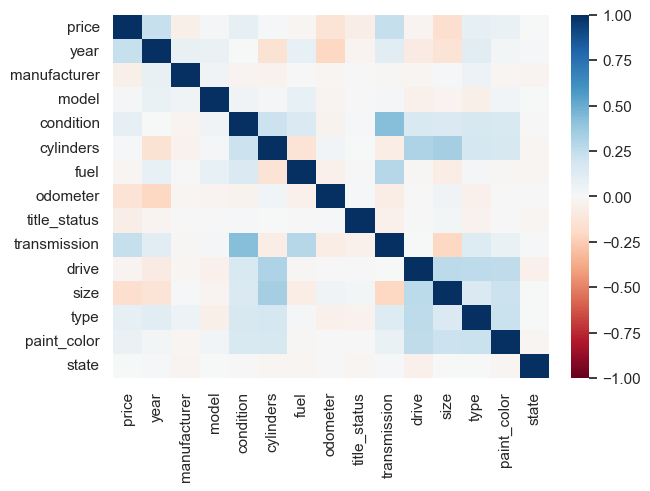

In [67]:
show_correlation(df, show_heatmap=True)

In [68]:
def visualize_data(title, df):
    show_col_box_plots(df, rescale=False)
    show_col_box_plots(df)
    show_col_hist(df)
    show_bar_plots(df)
    show_pair_plots(df)


Box Plots

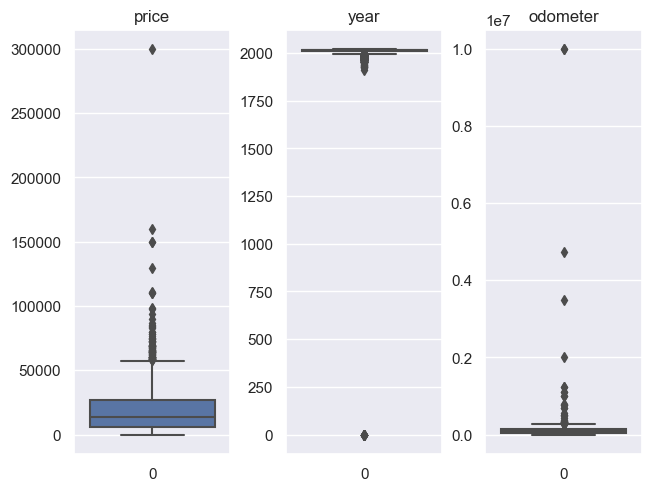

In [69]:
#visualize_data(dataset_title, df)

show_col_box_plots(df, rescale=False)

### Outliers

The above box plots for the numeric features without any rescaling show that there are some outliers that we need to cleanup.


In [70]:
# Cap outliers in numeric columns based on number of standard deviations.
def cap_outliers(df, z_mult):
    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            lower_limit = df[colname].mean() - z_mult * df[colname].std()
            upper_limit = df[colname].mean() + z_mult * df[colname].std()
            print(f"Capping column: {colname} lower={lower_limit} upper={upper_limit}")
            
            df[colname] = np.where(
                df[colname] > upper_limit, upper_limit,
                np.where(
                    df[colname] < lower_limit, lower_limit,
                    df[colname]
                )
            )

    return df

In [71]:
show_heading("Data Cleaning")

df_cleaned = df.copy()

# Do some adjustments on particular columns based on meaning of columns.

# Drops rows without price information.
df_cleaned  = df_cleaned.dropna(subset=['price'])

# No zero or negative prices.
MIN_PRICE = 1
# Keep the max price to a reasonable value.
MAX_PRICE = 300000

df_cleaned = df_cleaned.drop(df[df['price'] < MIN_PRICE].index)
df_cleaned = df_cleaned.drop(df[df['price'] > MAX_PRICE].index)

# No years in the future.
MAX_YEAR = 2023
df_cleaned['year'] = np.where(df_cleaned['year'] > MAX_YEAR, MAX_YEAR, df_cleaned['year'])

# No huge odometer values.
MAX_MILES = 300000
df_cleaned['odometer'] = np.where(df_cleaned['odometer'] > MAX_MILES, MAX_MILES, df_cleaned['odometer'])

# cap outliers beyond 3 std devs.
df_cleaned = cap_outliers(df_cleaned, z_mult=3)

# Impute value for missing fields.
df_cleaned['year'] = df_cleaned['year'].fillna(df_cleaned['year'].mean())
df_cleaned['odometer'] = df_cleaned['odometer'].fillna(df_cleaned['odometer'].mean())

# TODO: replace categorical missing values with 'missing'

display(df_cleaned.describe())

Data Cleaning

Capping column: price lower=-28949.29861815275 upper=66803.92383662965
Capping column: year lower=1980.9686171009303 upper=2040.9527452832422
Capping column: odometer lower=-99214.26310695044 upper=282185.3078305685


,price,year,odometer
count,4005.000000,4005.000000,4005.000000
mean,18670.343233,2011.399430,91336.587960
std,14383.710046,7.799939,62900.265785
min,1.000000,1980.968617,0.000000
25%,7495.000000,2008.000000,38512.000000
50%,14995.000000,2013.000000,86263.000000
75%,27942.000000,2017.000000,133392.000000
max,66803.923837,2021.000000,282185.307831


Dataset Name: Cleaned Craigslist

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 0 to 4349
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4005 non-null   float64
 1   year          4005 non-null   float64
 2   manufacturer  3838 non-null   object 
 3   model         3966 non-null   object 
 4   condition     2441 non-null   object 
 5   cylinders     2325 non-null   object 
 6   fuel          3975 non-null   object 
 7   odometer      4005 non-null   float64
 8   title_status  3933 non-null   object 
 9   transmission  3985 non-null   object 
 10  drive         2724 non-null   object 
 11  size          1119 non-null   object 
 12  type          3124 non-null   object 
 13  paint_color   2840 non-null   object 
 14  state         4005 non-null   object 
dtypes: float64(3), object(12)
memory usage: 500.6+ KB


None

Sample:


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,52990.0,2020.0,jaguar,e-pace p300 r-dynamic se,good,NaN,gas,79.0,clean,other,NaN,NaN,other,white,al
1,3399.0,2006.0,buick,lacrosse,NaN,6 cylinders,gas,160218.0,clean,automatic,fwd,NaN,sedan,blue,al
2,2500.0,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
3,20870.0,2019.0,infiniti,qx30,NaN,NaN,gas,29938.0,clean,automatic,fwd,NaN,NaN,red,al
4,34590.0,2018.0,ford,f150 super cab xl pickup 4d,good,6 cylinders,gas,20856.0,clean,other,NaN,NaN,pickup,white,al


Shape: (4005, 15)
Types:


price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

Null Proportion:


price           0.000000
year            0.000000
manufacturer    0.041698
model           0.009738
condition       0.390512
cylinders       0.419476
fuel            0.007491
odometer        0.000000
title_status    0.017978
transmission    0.004994
drive           0.319850
size            0.720599
type            0.219975
paint_color     0.290886
state           0.000000
dtype: float64

Column: price

Numeric


count     4005.00000
mean     18670.34323
std      14383.71005
min          1.00000
25%       7495.00000
50%      14995.00000
75%      27942.00000
max      66803.92384
Name: price, dtype: object

Column: year

Numeric


count    4005.00000
mean     2011.39943
std         7.79994
min      1980.96862
25%      2008.00000
50%      2013.00000
75%      2017.00000
max      2021.00000
Name: year, dtype: object

Column: manufacturer

String


count     3838
unique      37
top       ford
freq       668
Name: manufacturer, dtype: object

Column: model

String


count      3966
unique     1921
top       f-150
freq         81
Name: model, dtype: object

Column: condition

String


count     2441
unique       6
top       good
freq      1237
Name: condition, dtype: object

Column: cylinders

String


count            2325
unique              7
top       6 cylinders
freq              902
Name: cylinders, dtype: object

Column: fuel

String


count     3975
unique       5
top        gas
freq      3358
Name: fuel, dtype: object

Column: odometer

Numeric


count      4005.00000
mean      91336.58796
std       62900.26578
min           0.00000
25%       38512.00000
50%       86263.00000
75%      133392.00000
max      282185.30783
Name: odometer, dtype: object

Column: title_status

String


count      3933
unique        6
top       clean
freq       3788
Name: title_status, dtype: object

Column: transmission

String


count          3985
unique            3
top       automatic
freq           3135
Name: transmission, dtype: object

Column: drive

String


count     2724
unique       3
top        4wd
freq      1196
Name: drive, dtype: object

Column: size

String


count          1119
unique            4
top       full-size
freq            610
Name: size, dtype: object

Column: type

String


count      3124
unique       13
top       sedan
freq        811
Name: type, dtype: object

Column: paint_color

String


count      2840
unique       12
top       white
freq        775
Name: paint_color, dtype: object

Column: state

String


count     4005
unique      51
top         ca
freq       445
Name: state, dtype: object

Box Plots

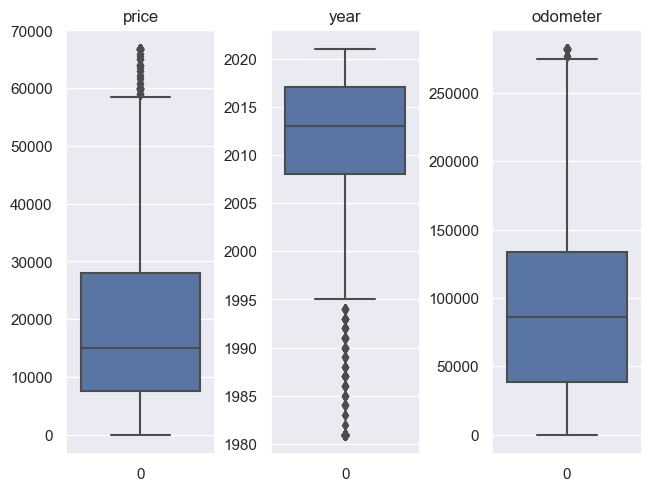

Box Plots (normalized)

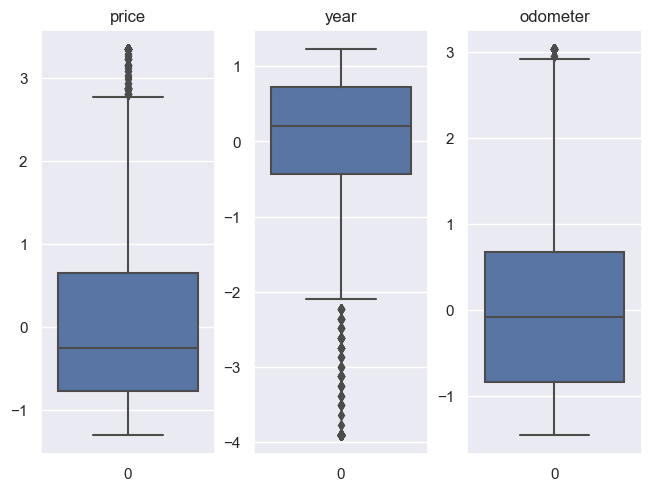

Histograms

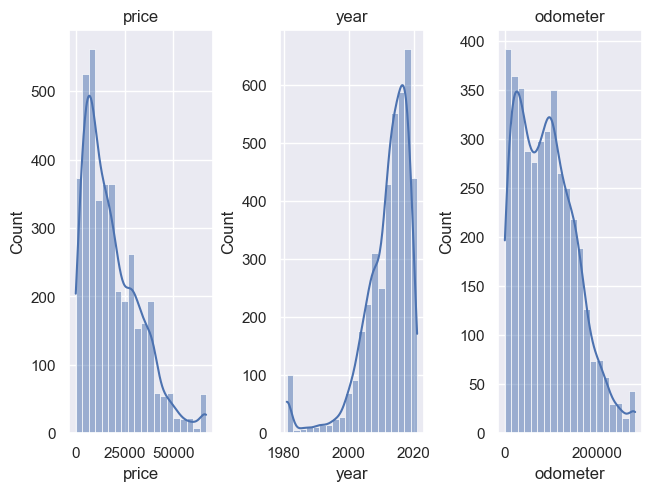

Column unique counts:
[('manufacturer', 37), ('model', 1921), ('condition', 6), ('cylinders', 7), ('fuel', 5), ('title_status', 6), ('transmission', 3), ('drive', 3), ('size', 4), ('type', 13), ('paint_color', 12), ('state', 51)]


Bar Charts

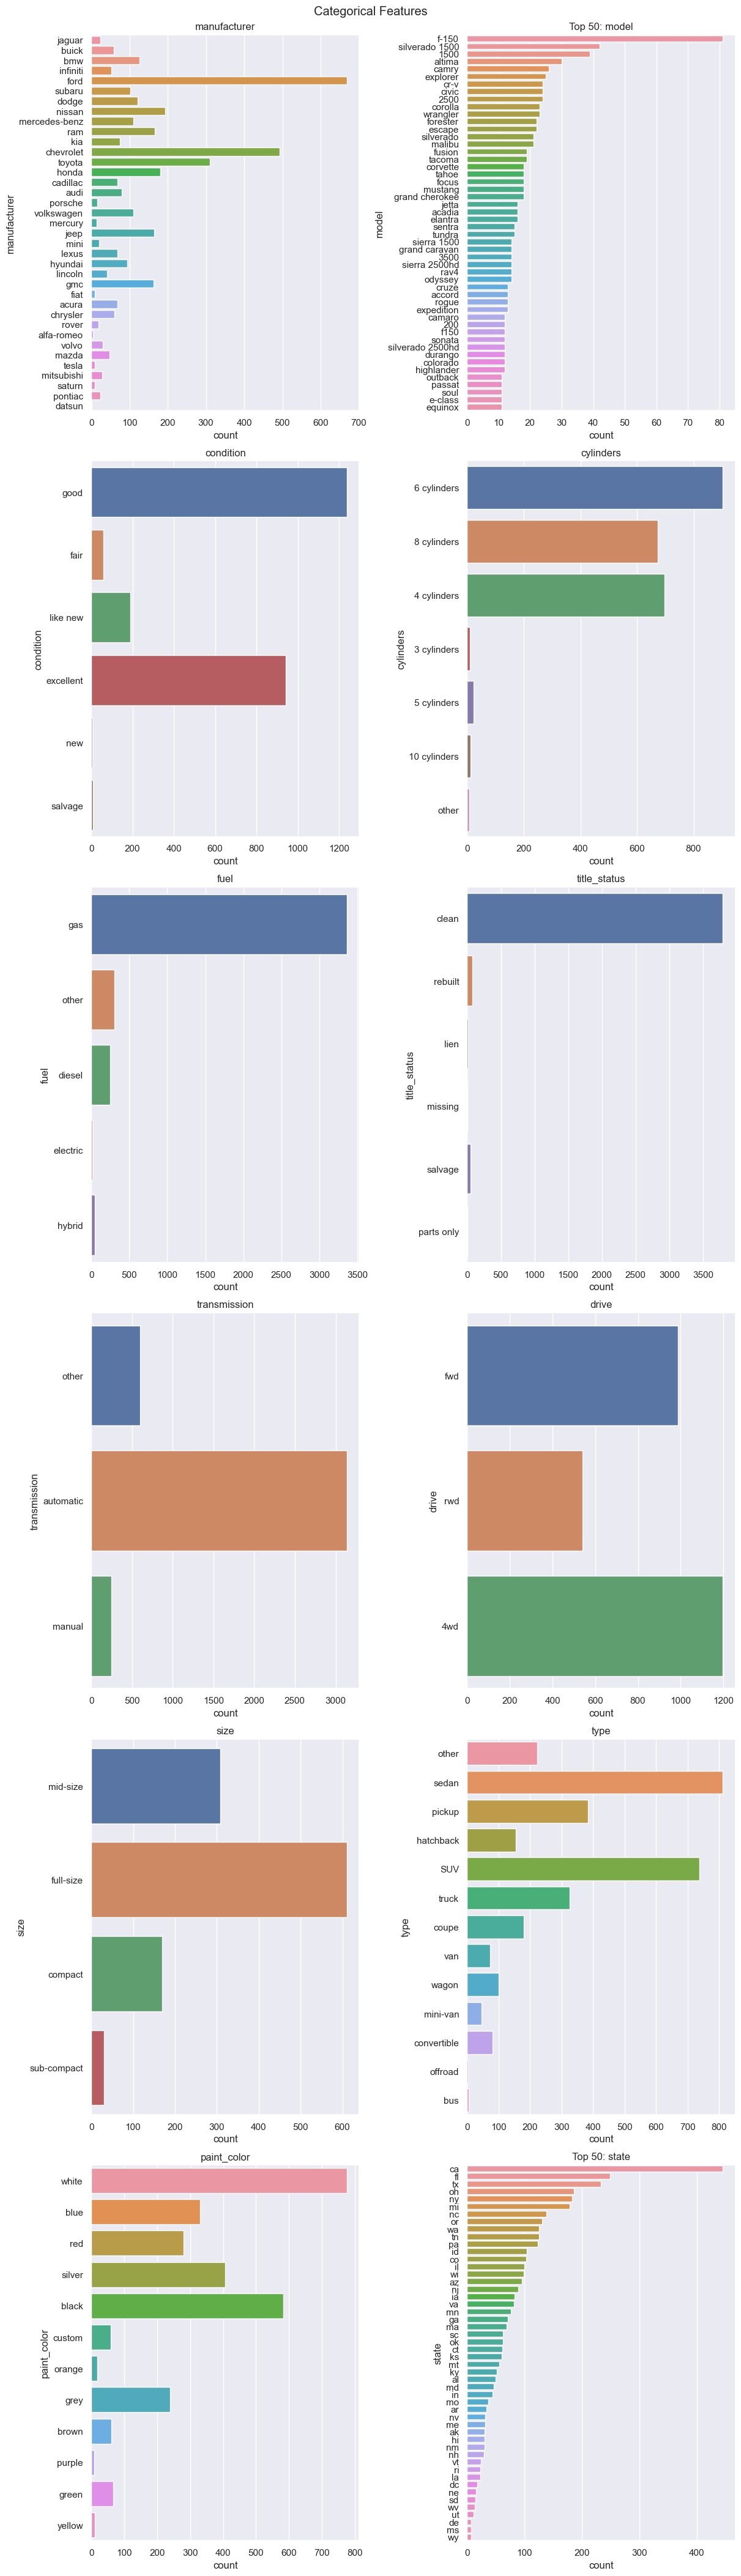

Pair Plots

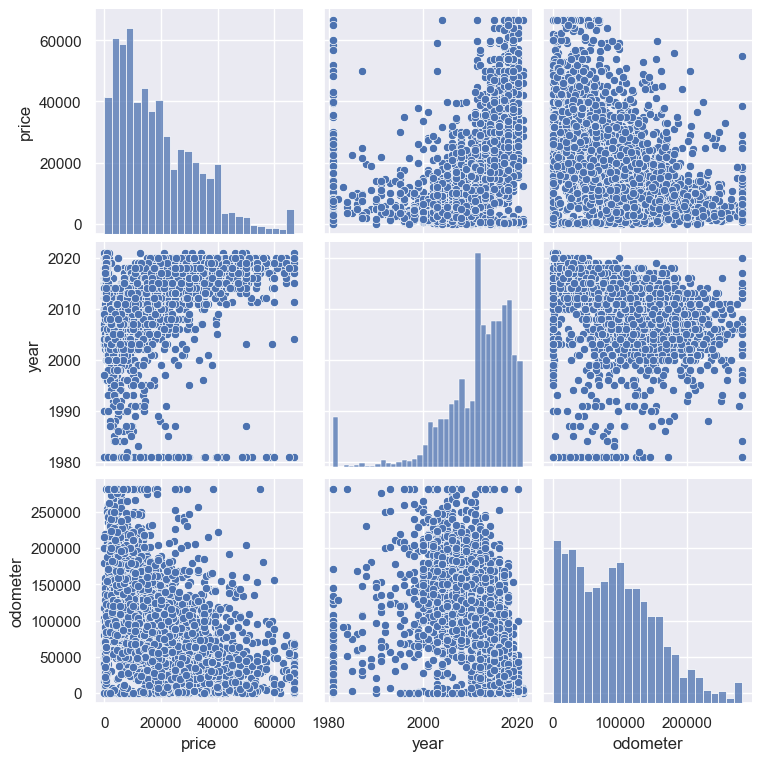

In [72]:
describe_data("Cleaned " + dataset_title, df_cleaned)
visualize_data("Cleaned " + dataset_title, df_cleaned)

## Conclusions from Visualizations

The pair plots show that price is related significantly to the year and odomoter values.

The histograms for price and odometer show distributions skewed towards more frequent values on the lower side, while the histogram for the year shows a distribution skewed towards more frequent higher (recent) years.

Correlation Heatmap

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
price,1.000000,0.228366,-0.057801,0.018375,0.092790,0.011146,-0.016006,-0.138187,-0.066129,0.235357,-0.025198,-0.167562,0.088897,0.065984,0.004979
year,0.228366,1.000000,0.077472,0.068443,0.005869,-0.144998,0.078642,-0.203388,-0.026170,0.111100,-0.079506,-0.136663,0.113572,0.026865,0.011912
manufacturer,-0.057801,0.077472,1.000000,0.045424,-0.026803,-0.042082,-0.006626,-0.018152,-0.004613,-0.012136,-0.017600,0.011449,0.056857,-0.019132,-0.027638
model,0.018375,0.068443,0.045424,1.000000,0.044642,0.020604,0.081075,-0.027641,-0.005120,0.019120,-0.053315,-0.030915,-0.054830,0.035310,0.004693
condition,0.092790,0.005869,-0.026803,0.044642,1.000000,0.215732,0.154863,-0.032295,0.011162,0.423038,0.159211,0.142009,0.168301,0.163386,-0.005516
cylinders,0.011146,-0.144998,-0.042082,0.020604,0.215732,1.000000,-0.132822,0.037837,0.004297,-0.077684,0.308581,0.336424,0.175284,0.171312,-0.023366
fuel,-0.016006,0.078642,-0.006626,0.081075,0.154863,-0.132822,1.000000,-0.049428,-0.002640,0.283579,-0.013973,-0.073890,0.018777,-0.011264,-0.015684
odometer,-0.138187,-0.203388,-0.018152,-0.027641,-0.032295,0.037837,-0.049428,1.000000,0.008944,-0.077123,-0.002414,0.042525,-0.052033,-0.003914,-0.002421
title_status,-0.066129,-0.026170,-0.004613,-0.005120,0.011162,0.004297,-0.002640,0.008944,1.000000,-0.049723,-0.005318,0.030850,-0.040797,-0.007679,-0.022746
transmission,0.235357,0.111100,-0.012136,0.019120,0.423038,-0.077684,0.283579,-0.077123,-0.049723,1.000000,0.004818,-0.204817,0.137142,0.063081,0.010559


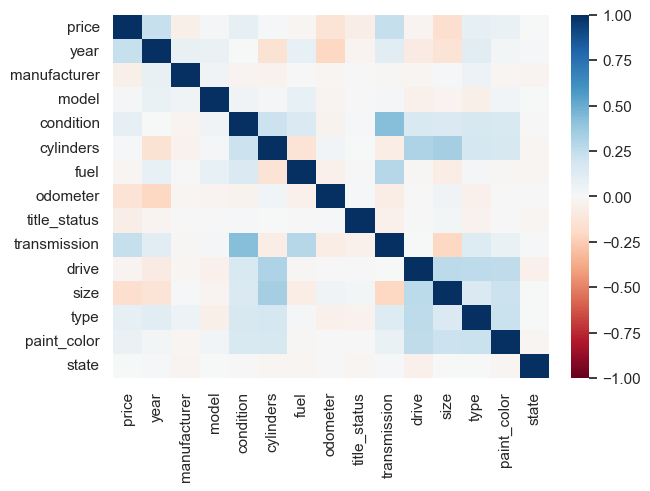

In [73]:
# Let's reexamine the correlation heatmap after cleaning up the outliers and missing values.
show_correlation(df, show_heatmap=True)

## Findings

- [ ] TODO: summarize any visual and quantitative exploratory findings from (1)
- [ ] TODO: outline and motivate a course for (2).
- [ ] TODO: and discussion of why it may be possible to conduct the target analysis,
- [ ] TODO: including any relevant pre-built technologies and tools that will make it possible,  and how. 
- [ ] TODO: discuss the correlations between price and other features.
- [ ] TODO: drop rows with missing price value.
- [ ] TODO: Can be later; handle imputation of misisng values to 0 or 'missing'
- [ ] TODO: Additionally, this inital project planning report should speculate and provide examples for potential analytic outcomes and how we might interpret and build from them, whether towards academic or commercial outcomes.


### Selection of Dataset for Continued Analysis

The Carvana dataset provides very few columns(`Name,Year,Miles,Price`), and a much smaller set of samples than the other datasets.

The CarGurus dataset has the largest rows and the most feature columns avaiable(at 66).
However, it only provides location data as zip code, longitude and latitude, which would make analyzing the effect on price from different areas more difficult since would prefer to just compare prices across US states.

Both the Craigslist and Carvana datasets have some data cleaning work required to remove outliers as well as signficiant numbers of null values.

The TrueCar dataset is by far the cleanest dataset, having no null values, and more columsn than the Carvana dataset. However, the columns available would only allow some of the investigations we have in mind. 
It provides Price,Year,Mileage,City,State,Vin,Make,Model. Vin is of little use without advanced preprocessing based on VIN coding, so the only advantage in features it providese to the Carvana dataset are from location based on `City, State`.

The Craigslist dataset is most amenable to the investigations planned in terms of the columns available. This is because it includes a column for the state location, the same basic make,  model, price, mileage and year information common to all the datasets, but also has a number of additional feature columns which may affect price.
The complete columns are: 
`id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,  fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date`


### Features

It is clear from the correlation values that price is correlated with year of the car. And it is also apparent that the odomoter mileage is negatively correlated with the price. These are not surprising findings.

Other relationships are less obvious from the graphs. This is likely to be partly due to most of the features being categorical and not necessarily ordered in a meaningfull way before correlations were calculated.

There are a significant number of null values remaining in the categorical data after the data cleaning we have already done. For example, cylinders column is missing in over 41% of the rows.

#### Null Value Proportion by Column

    price           0.000000
    year            0.002588
    manufacturer    0.039755
    model           0.011291
    condition       0.396377
    cylinders       0.417314
    fuel            0.006351
    odometer        0.011997
    title_status    0.020936
    transmission    0.006351
    drive           0.312162
    size            0.717008
    type            0.215949
    paint_color     0.310750
    state           0.000000




## Limitations

During this phase used sampled 1% of the larger datasets to speed up initial analysis and debugging of code.
Phase two of the project will use the full Craigslist dataset.

Only preliminary data cleaning has been done. Imputation for missing values that remain is still needed.

## Phase Two Plans

In conclusion, the data is able to support most of the investigations planned for phase two.

Specifically, for phase two we will go deeper into answering these questions:

- Which features are most useful for 
- How much the make and model of the car matters for different age vehicles compared to the condition.
- How much location, within different states for example, affects the price of similar vehicles.
- How well a regression model built for this data will perform on test data.

However, I was not able to locate datasets suitable to measuring the relationship between new car sales and used car prices.

For phase two of the project, the plan is to:

1. Begin by comleting data cleanup of the Craigslist dataset, especially imputation of missing categorical feature values.
2. Create a baseline linear regression model to predict price.
3. Create lasso and ridge regression models for price to see how they compare to baseline.
4. Use XGBoost library to create a regression model and also evaluate feature importance.
5. Create a report and presentation based on the findings.

If time is available to do additional work beyond the plan above, then I also plan to evaluate using Random Cut Forest for regression and evaluating feature importance and compare the results with XGBoost.

Lastly, time permitting, I plan to use [Streamlit.io](https://streamlit.io/) to create a web interface for serving an inference endpoint so that a user can input the feature values for a used car and see the price the model predicts.


The report will be distributed to intereseted parties(professor, classmates, other peers) as well as stakeholders interested in how predictable used car prices are with this model who can view the report and use the online inference web interface.



